In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [6]:
noise

array([ 0.76537262,  0.2642971 , -0.86017286, ...,  0.87226445,
       -0.81981227, -1.13401446])

In [7]:
y_true = (0.5 * x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [10]:
y_df.head()

,Y
0,5.765373
1,5.264302
2,4.139837
3,3.423806
4,6.612345


In [11]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [12]:
my_data

,X Data,Y
0,0.00000,5.765373
1,0.00001,5.264302
2,0.00002,4.139837
3,0.00003,3.423806
4,0.00004,6.612345
5,0.00005,4.842507
6,0.00006,4.258660
7,0.00007,4.182359
8,0.00008,5.588350
9,0.00009,4.770144


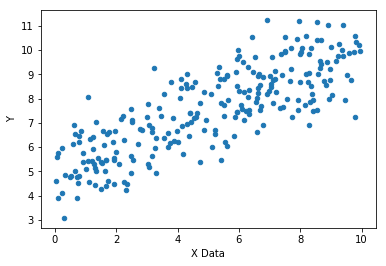

In [13]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [14]:
batch_size = 13

In [15]:
np.random.randn(2)

array([ 0.69276741, -1.29949929])

In [16]:
m = tf.Variable(0.31463155)
b = tf.Variable(1.62630974)

In [17]:
xph = tf.placeholder(tf.float32,[batch_size])

In [18]:
yph = tf.placeholder(tf.float32,[batch_size])

In [25]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [32]:
train = optimizer.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as Sess:
    Sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        Sess.run(train,feed_dict = feed)
    model_m,model_b = Sess.run([m,b])

In [47]:
model_m

0.54958355

In [48]:
model_b

5.0553856

In [49]:
y_hat = x_data * model_m + model_b

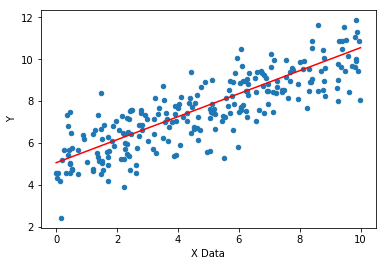

In [50]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [19]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [20]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MANHLE~1\\AppData\\Local\\Temp\\tmp8xi78yxz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000248B37AAC88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_eval,y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [45]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs = None, shuffle= True)

In [46]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs = 10000, shuffle= False)

In [47]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8, num_epochs = 10000, shuffle= False)

In [48]:
estimator.train(input_fn=input_func,steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt.
INFO:tensorflow:loss = 36.428577, step = 101
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt.
INFO:tensorflow:Loss for final step: 22.708218.


In [49]:
train_metrics = estimator.evaluate(input_fn= train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-03-02:42:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-03-02:42:28
INFO:tensorflow:Saving dict for global step 200: average_loss = 2.6802313, global_step = 200, label/mean = 7.509037, loss = 21.44185, prediction/mean = 6.784097
INFO:tensorflow:Saving 'checkpoint_path' 

In [50]:
eval_metrics= estimator.evaluate(input_fn = eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-03-02:42:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-03-02:42:30
INFO:tensorflow:Saving dict for global step 200: average_loss = 2.752534, global_step = 200, label/mean = 7.513151, loss = 22.020271, prediction/mean = 6.752575
INFO:tensorflow:Saving 'checkpoint_path' 

In [51]:
print('TRAINING_DATA_METRICS')
print(train_metrics)

TRAINING_DATA_METRICS
{'average_loss': 2.6802313, 'label/mean': 7.509037, 'loss': 21.44185, 'prediction/mean': 6.784097, 'global_step': 200}


In [52]:
print('EVAL_METRICS')
print(eval_metrics)

EVAL_METRICS
{'average_loss': 2.752534, 'label/mean': 7.513151, 'loss': 22.020271, 'prediction/mean': 6.752575, 'global_step': 200}


In [53]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [54]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([2.419963], dtype=float32)},
 {'predictions': array([3.3893335], dtype=float32)},
 {'predictions': array([4.358704], dtype=float32)},
 {'predictions': array([5.3280745], dtype=float32)},
 {'predictions': array([6.2974453], dtype=float32)},
 {'predictions': array([7.266815], dtype=float32)},
 {'predictions': array([8.236185], dtype=float32)},
 {'predictions': array([9.205556], dtype=float32)},
 {'predictions': array([10.174927], dtype=float32)},
 {'predictions': array([11.144298], dtype=float32)}]

In [55]:
predictions = []
for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmp8xi78yxz\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions

[array([2.419963], dtype=float32),
 array([3.3893335], dtype=float32),
 array([4.358704], dtype=float32),
 array([5.3280745], dtype=float32),
 array([6.2974453], dtype=float32),
 array([7.266815], dtype=float32),
 array([8.236185], dtype=float32),
 array([9.205556], dtype=float32),
 array([10.174927], dtype=float32),
 array([11.144298], dtype=float32)]

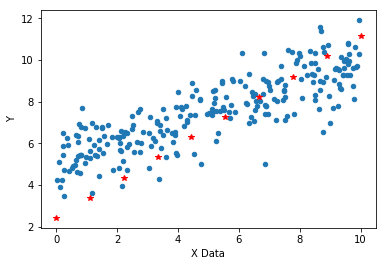

In [57]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y = 'Y')
plt.plot(brand_new_data,predictions,'r*')